In [1]:
#Import nltk corpus and tag each sentence
import nltk
 
pos_tagged = nltk.corpus.treebank.tagged_sents()
 
print(pos_tagged[0])
print("Tagged sentences: ", len(pos_tagged))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
Tagged sentences:  3914
Tagged words: 100676


In [2]:
import numpy as np
 
sentences, sentence_tags =[], [] 
for sent in pos_tagged:
    sentence, tags = zip(*sent)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))
 
# Printing a Sequence
print(sentences[5])
print(sentence_tags[5])

['Lorillard' 'Inc.' ',' 'the' 'unit' 'of' 'New' 'York-based' 'Loews'
 'Corp.' 'that' '*T*-2' 'makes' 'Kent' 'cigarettes' ',' 'stopped' 'using'
 'crocidolite' 'in' 'its' 'Micronite' 'cigarette' 'filters' 'in' '1956'
 '.']
['NNP' 'NNP' ',' 'DT' 'NN' 'IN' 'JJ' 'JJ' 'NNP' 'NNP' 'WDT' '-NONE-' 'VBZ'
 'NNP' 'NNS' ',' 'VBD' 'VBG' 'NN' 'IN' 'PRP$' 'NN' 'NN' 'NNS' 'IN' 'CD'
 '.']


In [3]:
#Split as train and test set
from sklearn.model_selection import train_test_split

(train_sentences, 
 test_sentences, 
 train_tags, 
 test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2)

In [4]:
#Word to index dictionary and Tag to index dictionary
words, tags = set([]), set([])
 
for s in train_sentences:
    for w in s:
        words.add(w.lower())
 
for ts in train_tags:
    for t in ts:
        tags.add(t)
 
w_to_i = {w: i + 2 for i, w in enumerate(list(words))}
w_to_i['-PAD-'] = 0  # The special value used for padding
w_to_i['-OOV-'] = 1  # The special value used for OOVs
 
t_to_i = {t: i + 1 for i, t in enumerate(list(tags))}
t_to_i['-PAD-'] = 0  # The special value used to padding

In [5]:
#Encode train and test sentences

X_train, X_test, Y_train, Y_test = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(w_to_i[w.lower()])
        except KeyError:
            s_int.append(w_to_i['-OOV-'])
 
    X_train.append(s_int)
 
for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(w_to_i[w.lower()])
        except KeyError:
            s_int.append(w_to_i['-OOV-'])
 
    X_test.append(s_int)
 
for s in train_tags:
    Y_train.append([t_to_i[t] for t in s])
 
for s in test_tags:
    Y_test.append([t_to_i[t] for t in s])
 
print(X_train[0])
print(X_test[0])
print(Y_train[0])
print(Y_test[0])

[7905, 8306, 8928, 5947, 10023, 5827, 466, 4181, 4926, 10023, 6444, 1300, 6528, 7696, 5597, 2207, 2876, 29, 7905, 10167, 7574, 8236]
[1826, 1, 2938, 6391, 3412, 1, 2390, 8318, 1826, 1, 6877, 7052, 8010, 3412, 1, 461, 7052, 8236]
[42, 41, 20, 6, 42, 41, 20, 46, 6, 42, 41, 20, 4, 1, 13, 21, 6, 41, 42, 41, 20, 12]
[3, 15, 27, 20, 30, 21, 27, 21, 3, 27, 6, 3, 38, 30, 21, 27, 3, 12]


In [6]:
MAX_LENGTH = len(max(X_train, key=len))
print(MAX_LENGTH)  

271


In [7]:
from keras.preprocessing.sequence import pad_sequences
 
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH, padding='post')
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH, padding='post')
Y_train = pad_sequences(Y_train, maxlen=MAX_LENGTH, padding='post')
Y_test = pad_sequences(Y_test, maxlen=MAX_LENGTH, padding='post')
 
print(X_train[0])
print(X_test[0])
print(Y_train[0])
print(Y_test[0])

[ 7905  8306  8928  5947 10023  5827   466  4181  4926 10023  6444  1300
  6528  7696  5597  2207  2876    29  7905 10167  7574  8236     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 
 
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(w_to_i), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(t_to_i))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['categorical_accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 271, 128)          1305088   
_________________________________________________________________
bidirectional (Bidirectional (None, 271, 512)          788480    
_________________________________________________________________
time_distributed (TimeDistri (None, 271, 47)           24111     
_________________________________________________________________
activation (Activation)      (None, 271, 47)           0         
Total params: 2,117,679
Trainable params: 2,117,679
Non-trainable params: 0
_________________________________________________________________


In [9]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)
    

In [10]:
cat_Y_train = to_categorical(Y_train, len(t_to_i))
print(cat_Y_train[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [11]:
TF_FORCE_GPU_ALLOW_GROWTH= True

In [12]:
history = model.fit(X_train, to_categorical(Y_train, len(t_to_i)), batch_size=128, epochs=25, validation_split=0.2)

Epoch 1/25
20/20 [==============================] - 4s 225ms/step - loss: 1.2358 - categorical_accuracy: 0.8582 - val_loss: 0.3753 - val_categorical_accuracy: 0.9070
Epoch 2/25
20/20 [==============================] - 4s 198ms/step - loss: 0.3350 - categorical_accuracy: 0.9069 - val_loss: 0.3224 - val_categorical_accuracy: 0.9042
Epoch 3/25
20/20 [==============================] - 4s 196ms/step - loss: 0.3148 - categorical_accuracy: 0.9090 - val_loss: 0.3107 - val_categorical_accuracy: 0.9164
Epoch 4/25
20/20 [==============================] - 4s 196ms/step - loss: 0.3045 - categorical_accuracy: 0.9170 - val_loss: 0.3021 - val_categorical_accuracy: 0.9168
Epoch 5/25
20/20 [==============================] - 4s 197ms/step - loss: 0.2966 - categorical_accuracy: 0.9171 - val_loss: 0.2947 - val_categorical_accuracy: 0.9167
Epoch 6/25
20/20 [==============================] - 4s 198ms/step - loss: 0.2886 - categorical_accuracy: 0.9173 - val_loss: 0.2871 - val_categorical_accuracy: 0.9183
Epoc

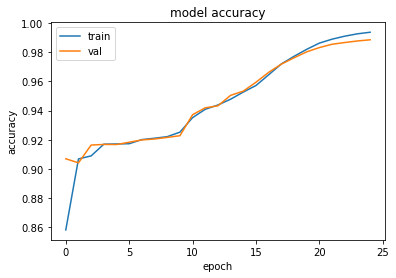

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

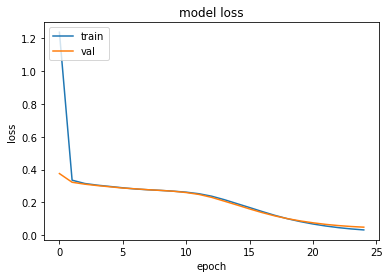

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
from keras.models import load_model
model = load_model("best_model2.h5")

In [10]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [18]:
scores = model.evaluate(X_test, to_categorical(Y_test, len(t_to_i)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")

25/25 [==============================] - 1s 27ms/step - loss: 0.0480 - categorical_accuracy: 0.9889
categorical_accuracy: 98.89251589775085


In [14]:
model.save("best_model2.h5")

In [61]:
test_samples = [
    "The food is really good .".split(),
    "We will eat today .".split()
]
print(test_samples)

[['The', 'food', 'is', 'really', 'good', '.'], ['We', 'will', 'eat', 'today', '.']]


In [62]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(w_to_i[w.lower()])
        except KeyError:
            s_int.append(w_to_i['-OOV-'])
    test_samples_X.append(s_int)
 
test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[10023  6675  4181  3083  7263  8236     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [63]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[7.83455289e-06 1.30391697e-06 1.84788700e-08 ... 1.98012776e-06
   2.87363264e-06 3.43013426e-07]
  [5.77143946e-05 1.04593906e-04 3.26638343e-03 ... 2.14479132e-06
   6.87002830e-05 3.51357194e-05]
  [1.18854325e-04 1.09395257e-03 1.32058412e-02 ... 4.99920025e-05
   6.96663558e-03 8.60003471e-01]
  ...
  [9.99962568e-01 1.04540702e-10 3.30660470e-07 ... 1.02411306e-08
   5.83800706e-08 2.66582734e-09]
  [9.99938369e-01 1.32127212e-10 2.85692835e-07 ... 2.12502442e-08
   6.79524206e-08 4.37604486e-09]
  [9.99902844e-01 1.60198216e-10 2.57598543e-07 ... 3.86971806e-08
   8.09147238e-08 7.16432336e-09]]

 [[2.95802951e-04 3.96849588e-04 4.37282911e-03 ... 1.40082469e-04
   3.73829808e-03 3.36819552e-02]
  [1.67460275e-05 1.05366297e-03 1.92945343e-04 ... 2.68174826e-05
   1.10242830e-03 1.21592134e-01]
  [9.80096171e-04 3.21156681e-01 6.46792911e-03 ... 4.40091186e-04
   4.01649205e-03 3.98744047e-02]
  ...
  [9.99962568e-01 1.04540702e-10 3.30660185e-07 ... 1.02411111e-08
   5.83800

In [64]:
def original_val(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [65]:
print(original_val(predictions, {i: t for t, i in t_to_i.items()}))

[['DT', 'NN', 'VBZ', 'RB', 'JJ', '.', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-',